# Evolução

Ao visualizarmos uma evolução, estamos interessados em analisar uma tendência nos dados ao longo de intervalos de tempo— uma série temporal. Por exemplo, podemos querer visualizar evolução de músicas solo vs. colaborações ou a média de streams das músicas mais populares, durante o ano de 2020. Nestes casos, gráficos de linha e de área são frequentemente utilizados, sendo semelhantes a um gráfico de dispersão, porém os pontos de medição são ordenados e unidos com segmentos de linha reta. Nos exemplos a seguir, analisamos a evolução de algumas variáveis do nosso conjunto de dados `Charts`, utilizando gráficos de linha e de área.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

In [2]:
# Lendo os dados
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv',
                        encoding='utf-8')

df_charts = pd.read_table('../dataset/spotify_charts_complete.tsv',
                          encoding='utf-8')
df_charts['chart_week'] = pd.to_datetime(df_charts['chart_week'])

display(df_hits.head(), df_charts.head())

,song_id,song_name,artist_id,...,speechiness,valence,tempo
0,2rRJrJEo19S2J82BDsQ3F7,Falling,['7uaIm6Pw7xplS8Dy06V6pT'],...,0.0364,0.236,127.087
1,3BYIzNZ3t9lRQCACXSMLrT,Venetia,['4O15NlyKLIASxsJ0PrXPfz'],...,0.1750,0.562,142.933
2,1g3J9W88hTG173ySZR6E9S,Tilidin Weg,['1aS5tqEs9ci5P9KD9tZWa6'],...,0.2330,0.171,109.090
3,75pQqzwgCjUOSSy5CpmAjy,Pero Ya No,['4q3ewBCX7sLwd24euuV69X'],...,0.1180,0.742,147.982
4,7kDUspsoYfLkWnZR7qwHZl,my ex's best friend (with blackbear),"['6TIYQ3jFPwQSRmorSezPxX', '2cFrymmkijnjDg9SS9...",...,0.0434,0.298,124.939


,chart_week,position,track_name,artist,streams,song_id
0,2020-01-02,1,Dance Monkey,Tones And I,50183626,1rgnBhdG2JDFTbYkYRZAku
1,2020-01-02,2,ROXANNE,Arizona Zervas,33254585,696DnlkuDOXcMAnKlTgXXK
2,2020-01-02,3,Tusa,KAROL G,29349573,7k4t7uLgtOxPwTpFmtJNTY
3,2020-01-02,4,Memories,Maroon 5,26067853,2b8fOow8UzyDFAE27YhOZM
4,2020-01-02,5,Falling,Trevor Daniel,25901488,4TnjEaWOeW0eKTKIEvJyCa


In [3]:
# Junção dos dois DataFrames
df_merged = pd.merge(df_charts, df_hits, on='song_id')
df_merged.head()

,chart_week,position,track_name,...,speechiness,valence,tempo
0,2020-01-02,1,Dance Monkey,...,0.0988,0.54,98.078
1,2020-01-09,1,Dance Monkey,...,0.0988,0.54,98.078
2,2020-01-16,1,Dance Monkey,...,0.0988,0.54,98.078
3,2020-01-23,1,Dance Monkey,...,0.0988,0.54,98.078
4,2020-01-30,1,Dance Monkey,...,0.0988,0.54,98.078


In [4]:
# Agrupando o DataFrame resultante pela semana do chart e calculando a média das variáveis numéricas
df = df_merged.groupby(['chart_week']).median()
df = df.reset_index()
df.head()

,chart_week,position,streams,...,speechiness,valence,tempo
0,2020-01-02,100.5,6558542.5,...,0.07460,0.5195,117.8825
1,2020-01-09,100.5,6331395.5,...,0.07495,0.5195,113.6490
2,2020-01-16,100.5,6852834.0,...,0.07460,0.5095,111.0820
3,2020-01-23,100.5,8019046.0,...,0.08315,0.5100,111.5415
4,2020-01-30,100.5,6868991.0,...,0.07995,0.5085,111.9320


## Gráfico de linha

Exibe a evolução de uma ou várias variáveis numéricas, onde os dados são conectados por segmentos de linha reta. É frequentemente usado para visualizar tendências e analisar como os dados mudaram ao longo do tempo. Os gráficos de linhas são desenhados primeiro traçando pontos de dados em uma grade de coordenadas cartesianas e, em seguida, conectando uma linha entre todos esses pontos. A seguir, mostramos a construção de um gráfico de linha, analisando a evolução da média de streams durante 2020. Inicialmente, utilizamos a função `matplotlib.pyplot.plot()` para criar um gráfico de dispersão e, em seguida, usamos a mesma função para criar o gráfico de linha simples.

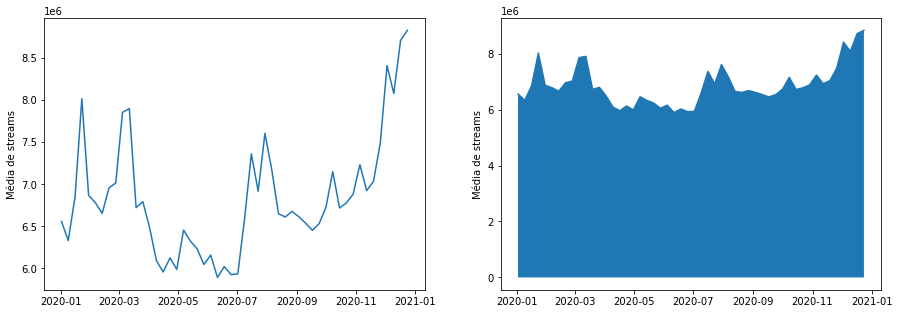

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot('chart_week', 'streams', '-', data=df) # gráfico de dispersão
ax[0].set_ylabel("Média de streams")
ax[1].plot('chart_week', 'streams', '-', data=df) # gráfico de área
ax[1].fill_between('chart_week', 'streams', data=df)
ax[1].set_ylabel("Média de streams");

Com os pontos conectados por uma linha, a visualização dá mais ênfase à tendência geral dos dados e menos às observações individuais. Em geral, quanto mais densa a série temporal, menos importante é mostrar as observações individuais com pontos, conforme mostrado no exemplo anterior. Para enfatizar ainda mais a tendência geral nos dados, também é possível preencher a área sob a curva com uma cor sólida. Neste caso, criaríamos um gráfico de área, exemplificado a seguir.

## Gráfico de área

Assim como os gráficos de linha, os gráficos de área são usados para exibir a evolução de valores quantitativos cronologicamente. Eles são mais comumente usados para mostrar tendências, em vez de transmitir valores específicos. Para criar um gráfico de área simples, existem duas funções principais usando Matplotlib: `fill_between()` e `stackplot()`. A seguir, plotamos a mesma série temporal do exemplo anterior, mas utilizando ambas funções.

## Conclusão

Este notebook apresentou como visualizar evoluções.

Este foi o fim desta parte do tutorial sobre ciência de dados. A próxima parte ([6.Jupyter.Avancado](../6.Jupyter.Avancado/6.1.IPython.ipynb)) apresentará como explorar características mais avançadas do Jupyter para a definição de novas formas de visualização e para se obter uma maior interatividade.
